In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df["species"] = df["species"].replace("Iris-setosa",0)
df["species"] = df["species"].replace("Iris-versicolor",1)
df["species"] = df["species"].replace("Iris-virginica",2)

In [8]:
df["species"].unique()

array([0, 1, 2], dtype=int64)

In [9]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


# Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Visualization of petal length and width')

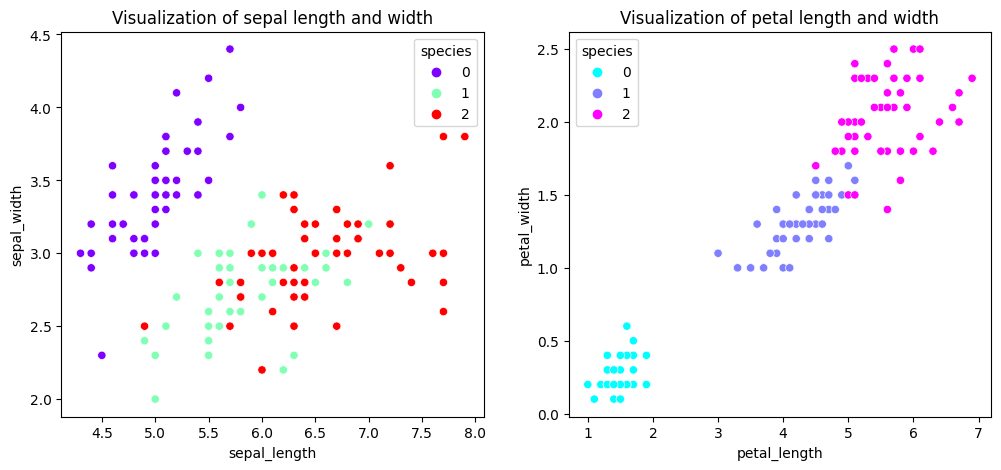

In [11]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

sns.scatterplot(x=df["sepal_length"], y=df["sepal_width"], palette="rainbow", hue=df["species"], ax=ax1)
sns.scatterplot(x=df["petal_length"], y=df["petal_width"], palette="cool", hue=df["species"], ax=ax2)
ax1.set_title("Visualization of sepal length and width")
ax2.set_title("Visualization of petal length and width")

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=["species"])
y = df["species"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

In [13]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [15]:
len(x_train)

120

In [16]:
len(x_test)

30

# Support Vector machine Model Building

In [17]:
from sklearn.svm import SVC

model = SVC(C=2, kernel="linear")

In [18]:
model

SVC(C=2, kernel='linear')

In [19]:
model.fit(x_train, y_train)

SVC(C=2, kernel='linear')

In [20]:
pred = model.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(pred, y_test)

0.9666666666666667

# Trying Logistic Regression on similar Dataset

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

C:\Users\DELL PC\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
lr_pred = lr.predict(x_test)
accuracy_score(lr_pred, y_test)

0.9666666666666667